In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from census import Census
from config import api_key
from scipy.stats import linregress

# file = "april-2021-active-enrolled-providers-report-with-formatting.csv"
# file_df = pd.read_csv(file)
# #file_df.columns
# file_df.head(5)

# import json
# import requests
# from pprint import pprint

# url = 'https://data.chhs.ca.gov/api/3/action/datastore_search?resource_id=a9967f81-aaa4-475e-8cd8-459dcc1be2df&limit=5&q=title:jones'  
# response = requests.get(url)
# provider = response.json()
# pprint(provider)


file = "april-2021-active-enrolled-providers-report-with-formatting.csv"
file_df = pd.read_csv(file, encoding="latin-1")
file_df.columns
# file_df.head(5)


C:\Users\17076\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0,9,10,12,14,15,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Provider Number', 'NPI Provider Number', 'Owner Number',
       'Service Location Number', 'Provider Legal Name',
       'Enrollment Status Effective Date', 'Provider Type Code',
       'Provider Type Code Desc', 'Provider License Number',
       'Provider Specialty Code', 'Provider Specialty Code Desc',
       'Out Of State Ind', 'Out Of State Desc', 'Provider Address County Code',
       'Provider Address County Code Desc', 'Provider Address Attention Line',
       'Provider Address Line 1', 'Provider Address Line 2',
       'Provider Address City', 'Provider Address State',
       'Provider Address Zip', 'Provider Address Latitude',
       'Provider Address Longitude', 'MSSA ID', 'Tract ID', 'File'],
      dtype='object')

In [2]:
provider_data_pd = file_df.loc[:, ["NPI Provider Number", "Provider Legal Name", "Provider Type Code Desc", 
                                   "Provider Specialty Code Desc", "Provider Address County Code Desc", 
                                   "Provider Address City", "Provider Address Zip", "Provider Address State",
                                  "Provider Address Latitude", "Provider Address Longitude"]]
provider_data_pd.head(25)

,NPI Provider Number,Provider Legal Name,Provider Type Code Desc,Provider Specialty Code Desc,Provider Address County Code Desc,Provider Address City,Provider Address Zip,Provider Address State,Provider Address Latitude,Provider Address Longitude
0,1.003000e+09,"MORGAN, ANNA C A MD",PHYSICIANS,Obstetrics-Gynecology (M.D. Only) Neonatal,Contra Costa,WALNUT CREEK,945965318,CA,37.892349,-122.058194
1,1.003001e+09,"CHUN, RICHARD B D MD INC",PHYSICIANS,"Gastroenterology (M.D. only), Oral Surgeon (De...",Placer,ROSEVILLE,956614548,CA,38.733819,-121.272036
2,1.003001e+09,"CHUN, RICHARD B D MD INC",PHYSICIANS,Internal Medicine,Placer,ROSEVILLE,956614548,CA,38.733819,-121.272036
3,1.003001e+09,"BENHARASH, PEYMAN MD",PHYSICIANS,Thoracic Surgery,Los Angeles,LOS ANGELES,900953075,CA,34.063697,-118.442444
4,1.003001e+09,"COYLE, TRIONA B PHD",PSYCHOLOGISTS,NaN,San Diego,SAN DIEGO,921231680,CA,32.823997,-117.121357
5,1.003001e+09,"NICHOLS, LAWRENCE M MD",PHYSICIANS,Dermatology,Orange,LA PALMA,906234700,CA,33.846415,-118.037995
6,1.003001e+09,"KIM, DAVID C MD",PHYSICIANS,"Pediatrics, Periodontist (Dentists Only)",San Bernardino,FONTANA,923354011,CA,34.099435,-117.421900
7,1.003001e+09,"STEVENS, CHARLES R MD",PHYSICIANS,Anesthesiology,Imperial,EL CENTRO,922434247,CA,32.778720,-115.569526
8,1.003002e+09,"TRIVEDI, VINOD MD",PHYSICIANS,Infectious Disease,Sacramento,SACRAMENTO,958255480,CA,38.574976,-121.418101
9,1.003002e+09,"SRINIVASAN, LAKSHMI MD",PHYSICIANS,Endocrinology,Santa Clara,SAN JOSE,951282604,CA,37.313397,-121.931908


In [3]:
# provider_data_pd.to_csv("provider_data.csv", index=False)

In [4]:
provider_data_pd.dropna()

,NPI Provider Number,Provider Legal Name,Provider Type Code Desc,Provider Specialty Code Desc,Provider Address County Code Desc,Provider Address City,Provider Address Zip,Provider Address State,Provider Address Latitude,Provider Address Longitude
0,1.003000e+09,"MORGAN, ANNA C A MD",PHYSICIANS,Obstetrics-Gynecology (M.D. Only) Neonatal,Contra Costa,WALNUT CREEK,945965318,CA,37.892349,-122.058194
1,1.003001e+09,"CHUN, RICHARD B D MD INC",PHYSICIANS,"Gastroenterology (M.D. only), Oral Surgeon (De...",Placer,ROSEVILLE,956614548,CA,38.733819,-121.272036
2,1.003001e+09,"CHUN, RICHARD B D MD INC",PHYSICIANS,Internal Medicine,Placer,ROSEVILLE,956614548,CA,38.733819,-121.272036
3,1.003001e+09,"BENHARASH, PEYMAN MD",PHYSICIANS,Thoracic Surgery,Los Angeles,LOS ANGELES,900953075,CA,34.063697,-118.442444
5,1.003001e+09,"NICHOLS, LAWRENCE M MD",PHYSICIANS,Dermatology,Orange,LA PALMA,906234700,CA,33.846415,-118.037995
...,...,...,...,...,...,...,...,...,...,...
240695,1.992999e+09,"NAIK, RAHUL R MD",PHYSICIANS,Hematology,Los Angeles,LOS ANGELES,900332480,CA,34.051199,-118.217598
240696,1.992999e+09,"NAIK, RAHUL R MD",PHYSICIANS,Neoplastic Diseases/Oncology,Los Angeles,LOS ANGELES,900332480,CA,34.051199,-118.217598
240697,1.992999e+09,DESERT COMMUNITIES,GROUND MEDICAL TRANSPORTATION,NOT APPLICABLE,San Bernardino,YUCCA VALLEY,922847311,CA,34.121886,-116.378435
240698,1.993000e+09,"YUEN, JENNY F",OPTOMETRISTS,NOT APPLICABLE,San Francisco,SAN FRANCISCO,941153130,CA,37.785675,-122.433197


In [5]:
physicians = provider_data_pd[(provider_data_pd["Provider Address State"]== "CA") &
                              (provider_data_pd["Provider Type Code Desc"]== "PHYSICIANS")]
physicians
physicians= physicians.rename(columns={"NPI Provider Number":"NPI",
                                       "Provider Legal Name": "Name",
                                       "Provider Type Code Desc": "Provider_Type",
                                       "Provider Specialty Code Desc": "Specialty",
                                       "Provider Address County Code Desc": "County",
                                       "Provider Address City": "City",
                                       "Provider Address Zip": "Zipcode",
                                       "Provider Address State": "State",
                                       "Provider Address Latitude": "Lat",
                                       "Provider Address Longitude": "Lng"})
clean_physicians = physicians.dropna(how = "any")
clean_physicians= clean_physicians.reset_index(drop = True)
clean_physicians


,NPI,Name,Provider_Type,Specialty,County,City,Zipcode,State,Lat,Lng
0,1.003000e+09,"MORGAN, ANNA C A MD",PHYSICIANS,Obstetrics-Gynecology (M.D. Only) Neonatal,Contra Costa,WALNUT CREEK,945965318,CA,37.892349,-122.058194
1,1.003001e+09,"CHUN, RICHARD B D MD INC",PHYSICIANS,"Gastroenterology (M.D. only), Oral Surgeon (De...",Placer,ROSEVILLE,956614548,CA,38.733819,-121.272036
2,1.003001e+09,"CHUN, RICHARD B D MD INC",PHYSICIANS,Internal Medicine,Placer,ROSEVILLE,956614548,CA,38.733819,-121.272036
3,1.003001e+09,"BENHARASH, PEYMAN MD",PHYSICIANS,Thoracic Surgery,Los Angeles,LOS ANGELES,900953075,CA,34.063697,-118.442444
4,1.003001e+09,"NICHOLS, LAWRENCE M MD",PHYSICIANS,Dermatology,Orange,LA PALMA,906234700,CA,33.846415,-118.037995
...,...,...,...,...,...,...,...,...,...,...
131946,1.992998e+09,"RAO, LEKHA M MD",PHYSICIANS,Neurology-Child,Los Angeles,LOS ANGELES,900953075,CA,34.063697,-118.442444
131947,1.992999e+09,"PARK, ALBERT K MD",PHYSICIANS,Internal Medicine,Orange,ANAHEIM,928073028,CA,33.853459,-117.816165
131948,1.992999e+09,"NAIK, RAHUL R MD",PHYSICIANS,Hematology,Los Angeles,LOS ANGELES,900332480,CA,34.051199,-118.217598
131949,1.992999e+09,"NAIK, RAHUL R MD",PHYSICIANS,Neoplastic Diseases/Oncology,Los Angeles,LOS ANGELES,900332480,CA,34.051199,-118.217598


In [6]:
print(clean_physicians.dtypes)
clean_physicians["Zipcode"] = clean_physicians["Zipcode"].apply(lambda x: str(x)[0:5])
clean_physicians



NPI              float64
Name              object
Provider_Type     object
Specialty         object
County            object
City              object
Zipcode            int64
State             object
Lat              float64
Lng              float64
dtype: object


,NPI,Name,Provider_Type,Specialty,County,City,Zipcode,State,Lat,Lng
0,1.003000e+09,"MORGAN, ANNA C A MD",PHYSICIANS,Obstetrics-Gynecology (M.D. Only) Neonatal,Contra Costa,WALNUT CREEK,94596,CA,37.892349,-122.058194
1,1.003001e+09,"CHUN, RICHARD B D MD INC",PHYSICIANS,"Gastroenterology (M.D. only), Oral Surgeon (De...",Placer,ROSEVILLE,95661,CA,38.733819,-121.272036
2,1.003001e+09,"CHUN, RICHARD B D MD INC",PHYSICIANS,Internal Medicine,Placer,ROSEVILLE,95661,CA,38.733819,-121.272036
3,1.003001e+09,"BENHARASH, PEYMAN MD",PHYSICIANS,Thoracic Surgery,Los Angeles,LOS ANGELES,90095,CA,34.063697,-118.442444
4,1.003001e+09,"NICHOLS, LAWRENCE M MD",PHYSICIANS,Dermatology,Orange,LA PALMA,90623,CA,33.846415,-118.037995
...,...,...,...,...,...,...,...,...,...,...
131946,1.992998e+09,"RAO, LEKHA M MD",PHYSICIANS,Neurology-Child,Los Angeles,LOS ANGELES,90095,CA,34.063697,-118.442444
131947,1.992999e+09,"PARK, ALBERT K MD",PHYSICIANS,Internal Medicine,Orange,ANAHEIM,92807,CA,33.853459,-117.816165
131948,1.992999e+09,"NAIK, RAHUL R MD",PHYSICIANS,Hematology,Los Angeles,LOS ANGELES,90033,CA,34.051199,-118.217598
131949,1.992999e+09,"NAIK, RAHUL R MD",PHYSICIANS,Neoplastic Diseases/Oncology,Los Angeles,LOS ANGELES,90033,CA,34.051199,-118.217598


In [7]:
# specialty_providers = physicians.groupby(["Specialty"]).count()
# specialty_providers
county_providers = clean_physicians.groupby(["County"])
county_providers_count = county_providers["County"].count()
county_providers_count

County
Alameda             5667
Alpine                 1
Amador                74
Butte                637
Calaveras             52
Colusa                28
Contra Costa        3396
Del Norte             56
El Dorado            352
Fresno              2595
Glenn                 35
Humboldt             533
Imperial             320
Inyo                  71
Kern                2333
Kings                248
Lake                 136
Lassen                65
Los Angeles        35601
Madera               446
Marin                763
Mariposa              15
Mendocino            246
Merced               463
Modoc                  9
Mono                  52
Monterey            1075
Napa                 367
Nevada               215
Orange              9304
Placer              1192
Plumas                28
Riverside           4451
Sacramento          7172
San Benito            67
San Bernardino      6270
San Diego          12404
San Francisco       8120
San Joaquin         2109
San Luis Obispo   

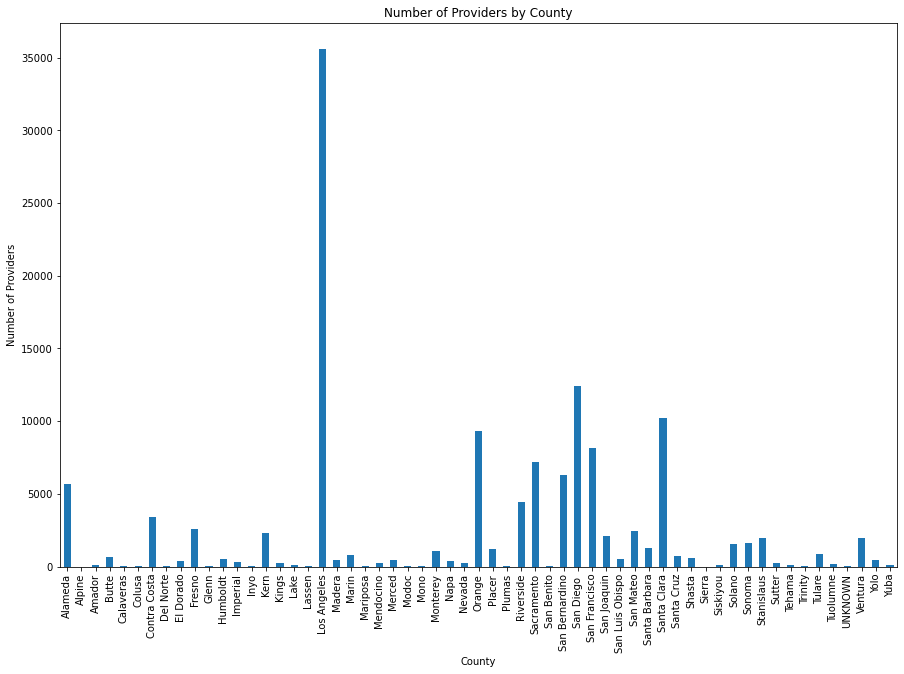

<Figure size 432x288 with 0 Axes>

In [308]:
county_chart = county_providers_count.plot(kind='bar', figsize = (15,10))

# Set the xlabel and ylabel using class methods
county_chart.set_xlabel("County")
county_chart.set_ylabel("Number of Providers")
plt.title("Number of Providers by County")
plt.savefig("output_figures/Number_of_Providers_by_County.png")
plt.show()
plt.tight_layout()



In [96]:
county_providers = clean_physicians.groupby(["County"])
county_specialty_count = county_providers["Specialty"].nunique()
county_specialty_count

County
Alameda            56
Alpine              1
Amador             18
Butte              44
Calaveras          12
Colusa              5
Contra Costa       48
Del Norte          14
El Dorado          35
Fresno             52
Glenn              10
Humboldt           34
Imperial           33
Inyo               18
Kern               49
Kings              28
Lake               19
Lassen             11
Los Angeles        62
Madera             38
Marin              41
Mariposa            5
Mendocino          32
Merced             37
Modoc               5
Mono               13
Monterey           48
Napa               38
Nevada             24
Orange             58
Placer             44
Plumas             10
Riverside          53
Sacramento         57
San Benito         13
San Bernardino     57
San Diego          58
San Francisco      55
San Joaquin        49
San Luis Obispo    42
San Mateo          49
Santa Barbara      47
Santa Clara        55
Santa Cruz         45
Shasta             39
Sie

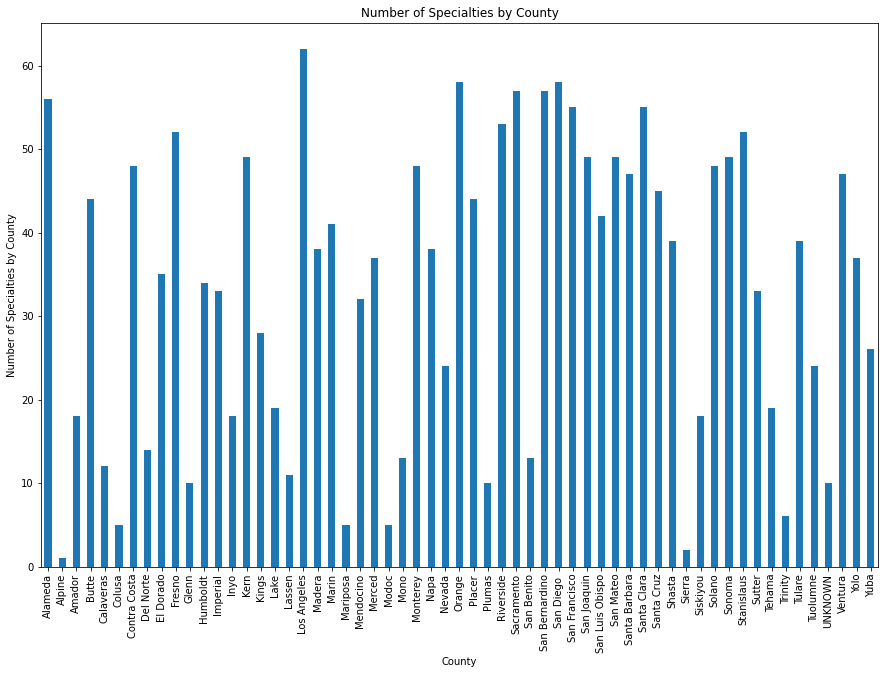

<Figure size 432x288 with 0 Axes>

In [300]:
specialty_count_chart = county_specialty_count.plot(kind='bar', figsize = (15,10))

# Set the xlabel and ylabel using class methods
specialty_count_chart.set_xlabel("County")
specialty_count_chart.set_ylabel("Number of Specialties by County")

plt.title("Number of Specialties by County")
plt.savefig("output_figures/Number_of_Specialties_by_County.png")
plt.show()
plt.tight_layout()



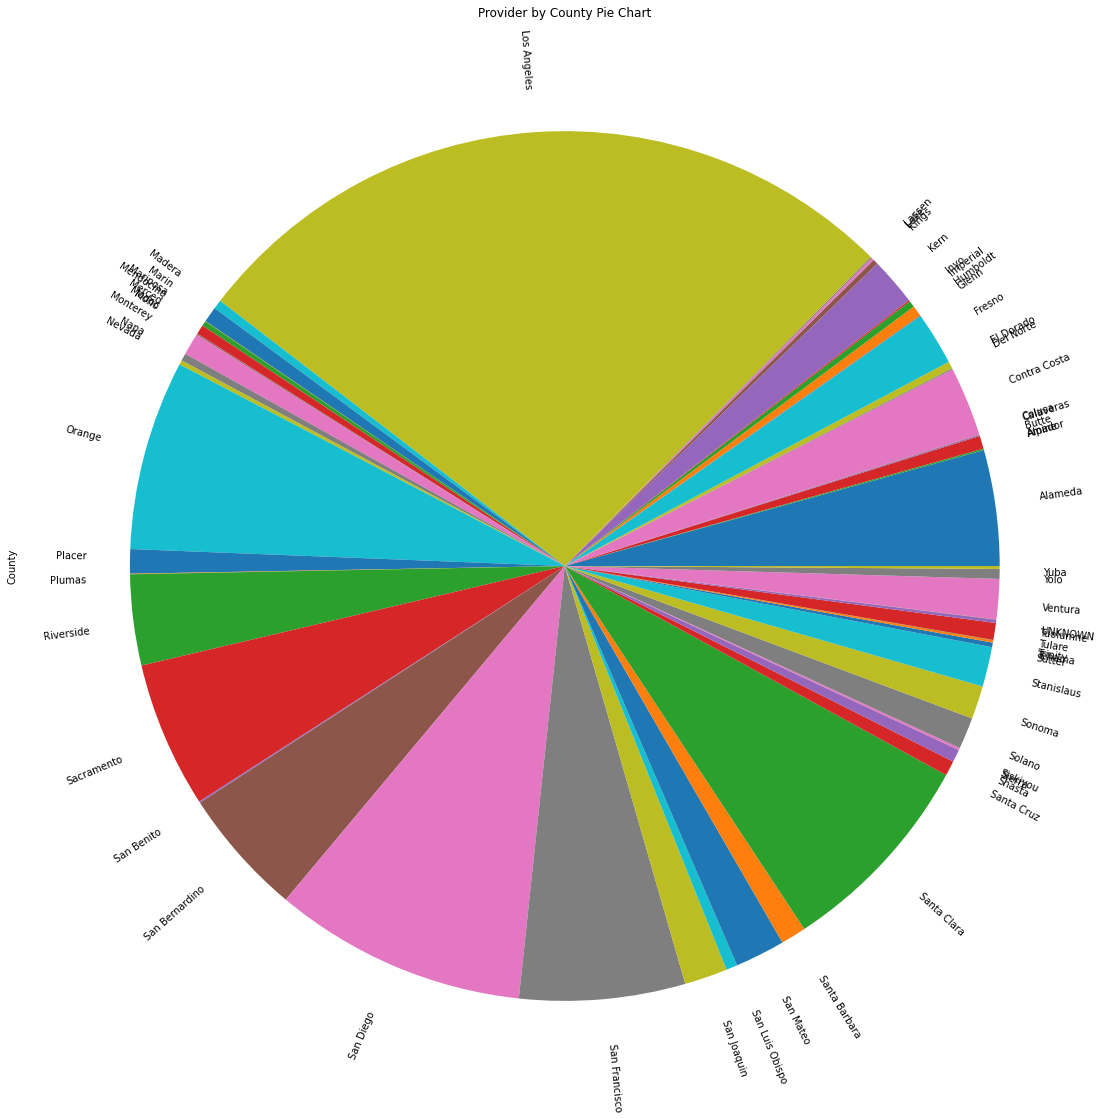

<Figure size 432x288 with 0 Axes>

In [309]:
county_pie = county_providers_count.plot(kind="pie", y='Provider Count', title=("Counties of CA "), figsize = (45,20), rotatelabels = True)
plt.title("Provider by County Pie Chart")
plt.savefig("output_figures/Pie_chart_Provider_Count__by_County.png")
plt.show()
plt.tight_layout()


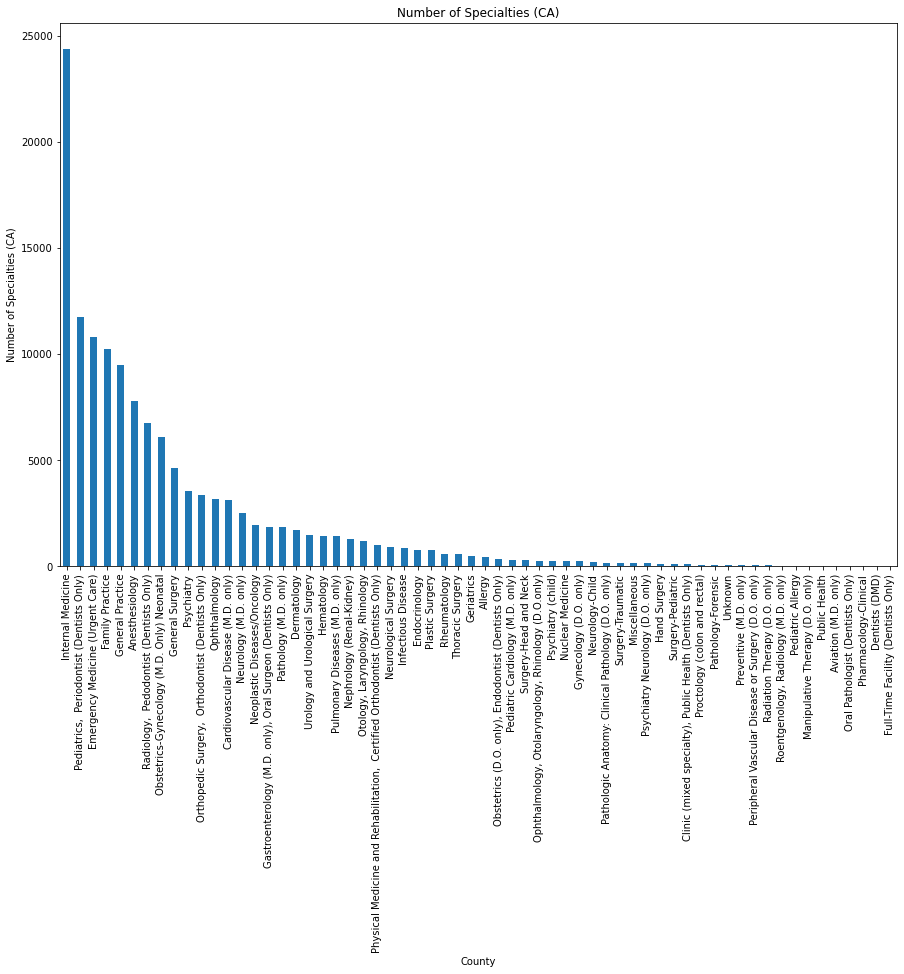

<Figure size 432x288 with 0 Axes>

In [302]:
specialty_providers = clean_physicians.groupby(["Specialty"])
specialty_count_CA = specialty_providers["NPI"].count()
specialty_count_CA
sorted_specialty_count_CA = specialty_count_CA.sort_values(ascending = False)
sorted_specialty_count_CA
specialty_CA = sorted_specialty_count_CA.plot(kind='bar', figsize = (15,10))

# # Set the xlabel and ylabel using class methods
specialty_CA.set_xlabel("County")
specialty_CA.set_ylabel("Number of Specialties (CA)")

plt.title("Number of Specialties (CA)")

plt.savefig("output_figures/Number_of_Specialties_CA.png")
plt.show()
plt.tight_layout()




# # sorted_spec= specialty_providers.sort_values(by=["NPI"],ascending = False)
# # sorted_spec.head(20)

In [11]:
# Census API Key
from config import api_key
c = Census(api_key, year=2019)


census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["Zipcode", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate"]]



# Visualize
print(len(census_pd))
census_pd.to_csv("census_data_zip.csv", encoding = "utf-8", index = False)

census_pd.head()
print(census_pd.dtypes)


33120
Zipcode               object
Population           float64
Median Age           float64
Household Income     float64
Per Capita Income    float64
Poverty Count        float64
Poverty Rate         float64
dtype: object


In [232]:


census_data = pd.merge(census_pd, clean_physicians, how = "right", on="Zipcode")
census_data



census_data = census_data.dropna()
census_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,NPI,Name,Provider_Type,Specialty,County,City,State,Lat,Lng
0,17065,3782.0,41.6,56118.0,32731.0,243.0,6.425172,1.154301e+09,"PELOT, MICHELE R MD",PHYSICIANS,Anesthesiology,Los Angeles,BALDWIN PARK,CA,34.072921,-117.730507
1,50515,193.0,45.9,30234.0,30538.0,60.0,31.088083,1.881880e+09,"CHEN, HONGWEI MD",PHYSICIANS,Internal Medicine,Santa Clara,SANTA CLARA,CA,37.335055,-121.995779
2,50530,1172.0,39.0,60903.0,25059.0,114.0,9.726962,1.649537e+09,"QAZI, MOHAMMAD U MD",PHYSICIANS,Family Practice,Riverside,RIVERSIDE,CA,33.906562,-117.470576
3,85119,24255.0,55.9,55579.0,30447.0,2785.0,11.482169,1.447280e+09,"DE LEON, AUREA A MD",PHYSICIANS,"Pediatrics, Periodontist (Dentists Only)",Santa Clara,SAN JOSE,CA,37.240400,-121.800309
4,90001,59832.0,29.1,43360.0,13727.0,15255.0,25.496390,1.053725e+09,"AKHAVAN, PARVIZ DO A MEDICAL",PHYSICIANS,"Gastroenterology (M.D. only), Oral Surgeon (De...",Los Angeles,LOS ANGELES,CA,33.960132,-118.262163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127587,96161,18488.0,41.5,98924.0,53453.0,1565.0,8.464950,1.992808e+09,"LOMBARD, JOHN T MD",PHYSICIANS,Cardiovascular Disease (M.D. only),Nevada,TRUCKEE,CA,39.324497,-120.201227
127588,97031,18902.0,39.7,66970.0,36942.0,895.0,4.734949,1.609088e+09,"SHAH, MONA S MD",PHYSICIANS,Internal Medicine,Los Angeles,SAN PEDRO,CA,33.729705,-118.292376
127589,98001,33699.0,38.9,90287.0,34806.0,2505.0,7.433455,1.881877e+09,"MAURER, ROBERT E MD INC",PHYSICIANS,General Practice,Shasta,REDDING,CA,40.574383,-122.404918
127590,99140,432.0,40.3,31389.0,21625.0,100.0,23.148148,1.124031e+09,"PAYAWAL, JONATHAN H MD",PHYSICIANS,Anesthesiology,Los Angeles,PANORAMA CITY,CA,34.219849,-118.430479


In [126]:
#count of this was 1287 county & zipcode combos
subset_data = census_data.groupby(["County", "Zipcode"]).max()

subset_df = subset_data.reset_index()
subset_df


# zips = subset_df["Zipcode"].unique()
# print(len(zips))

,County,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,NPI,Name,Provider_Type,Specialty,City,State,Lat,Lng
0,Alameda,90027,44770.0,38.1,66947.0,52257.0,5954.0,13.299084,1.619248e+09,"CARTER, STACEY C MD",PHYSICIANS,Urology and Urological Surgery,UNION CITY,CA,34.098161,-118.292966
1,Alameda,91786,53697.0,34.8,61898.0,27601.0,8436.0,15.710375,1.447337e+09,"PRASAD, CHAYA J MD",PHYSICIANS,Pathology (M.D. only),UPLAND,CA,34.100567,-117.638056
2,Alameda,94118,42095.0,37.2,121644.0,78360.0,3618.0,8.594845,1.750348e+09,"WHITE, TERRY MD",PHYSICIANS,Obstetrics-Gynecology (M.D. Only) Neonatal,OAKLAND,CA,37.799262,-122.231207
3,Alameda,94501,63821.0,40.3,94991.0,49921.0,5286.0,8.282540,1.992884e+09,"ZAKARI, MICHEL MD",PHYSICIANS,Urology and Urological Surgery,ALAMEDA,CA,37.783160,-122.235882
4,Alameda,94502,14701.0,42.5,154437.0,63423.0,324.0,2.203932,1.528146e+09,"ORKISZEWSKA, ALICJA MD",PHYSICIANS,Internal Medicine,HAYWARD,CA,37.745976,-122.089741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Yolo,95776,23911.0,33.4,81184.0,32947.0,3037.0,12.701267,1.851687e+09,"WANG, LEI MD",PHYSICIANS,Rheumatology,WOODLAND,CA,38.678371,-121.746837
1283,Yuba,95692,5251.0,42.0,80357.0,36713.0,259.0,4.932394,1.407872e+09,"CAMPBELL, WARREN C MD",PHYSICIANS,General Practice,WHEATLAND,CA,39.010965,-121.423247
1284,Yuba,95901,33455.0,31.7,54851.0,23771.0,5631.0,16.831565,1.972777e+09,"YEW, KEN MD",PHYSICIANS,Urology and Urological Surgery,MARYSVILLE,CA,39.153397,-121.552684
1285,Yuba,95919,971.0,54.7,59365.0,32953.0,113.0,11.637487,1.437170e+09,"ROSE, JOHN B MD",PHYSICIANS,General Practice,BROWNSVILLE,CA,39.456679,-121.282264


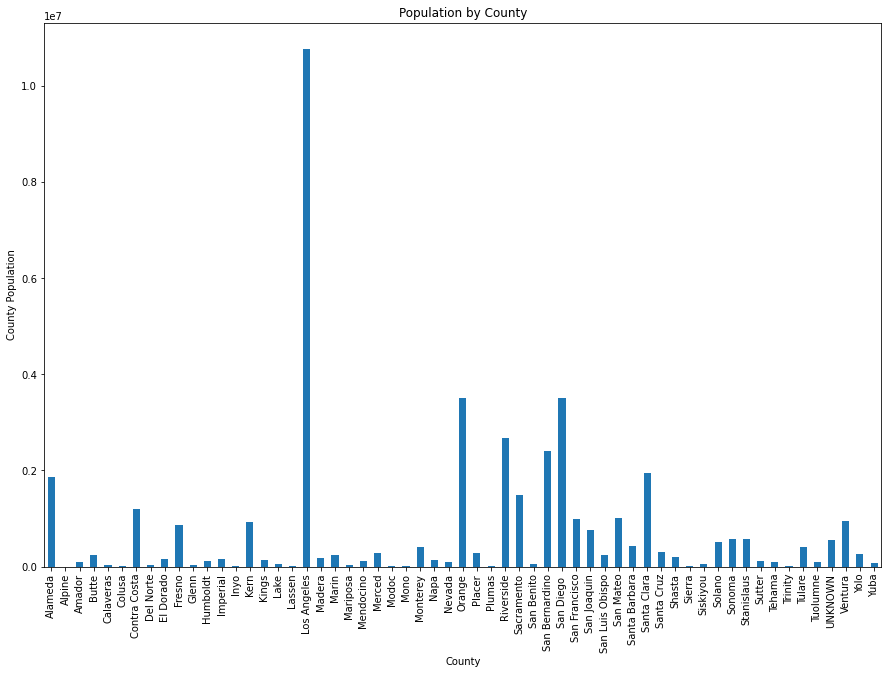

<Figure size 432x288 with 0 Axes>

In [311]:
county_pop = subset_df.groupby(["County"])
county_pop_sum = county_pop["Population"].sum()
county_pop_sum


county_pop_chart = county_pop_sum.plot(kind='bar', figsize = (15,10))

# Set the xlabel and ylabel using class methods
county_pop_chart.set_xlabel("County")
county_pop_chart.set_ylabel("County Population")

plt.title("Population by County")
plt.savefig("output_figures/County_Population.png")
plt.show()
plt.tight_layout()


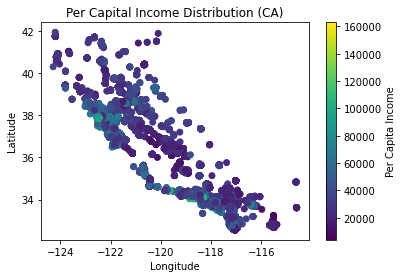

In [304]:

plt.scatter(census_data['Lng'],census_data['Lat'],c=census_data['Per Capita Income'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Per Capita Income")
plt.title("Per Capital Income Distribution (CA)")
plt.savefig("output_figures/Per_capita_income_distribution.png")
plt.show()


In [199]:

# zip_unique = []
# county_pop = census_data.groupby(["County"])
# for zip in census_data["Zipcode"]:
zip_unique = census_data["Zipcode"].unique()
    
zip = set(zip_unique)
unique_list = (list(zip))
unique_list = pd.DataFrame({"Zipcode":unique_list})
print(unique_list.head())

zip_county = pd.merge(left = census_pd, right = unique_list, how = "right", on="Zipcode")
zip_county



  Zipcode
0   90275
1   92307
2   96122
3   94102
4   92662


,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,17065,3782.0,41.6,56118.0,32731.0,243.0,6.425172
1,50515,193.0,45.9,30234.0,30538.0,60.0,31.088083
2,50530,1172.0,39.0,60903.0,25059.0,114.0,9.726962
3,85119,24255.0,55.9,55579.0,30447.0,2785.0,11.482169
4,90001,59832.0,29.1,43360.0,13727.0,15255.0,25.496390
...,...,...,...,...,...,...,...
1139,96161,18488.0,41.5,98924.0,53453.0,1565.0,8.464950
1140,97031,18902.0,39.7,66970.0,36942.0,895.0,4.734949
1141,98001,33699.0,38.9,90287.0,34806.0,2505.0,7.433455
1142,99140,432.0,40.3,31389.0,21625.0,100.0,23.148148


In [262]:
# count_spec_zip = census_data.groupby(["County", "Zipcode", "Lat", "Lng"])
count_spec_zip = census_data.groupby(["County", "Zipcode", "Lat", "Lng", "Poverty Rate"])
count_spec_zipcodes = count_spec_zip["NPI"].count()
count_spec_zipcodes
count_spec_zip_df = count_spec_zipcodes.reset_index()
count_spec_zip_df=count_spec_zip_df.sort_values(by ="NPI", ascending = False)
count_spec_zip_df = count_spec_zip_df.reset_index()
count_spec_zip_df
# count_spec_zip_df.describe()

# count_spec_zip_df.loc[count_spec_zip_df["NPI"]==2157]

,index,County,Zipcode,Lat,Lng,Poverty Rate,NPI
0,10376,Santa Clara,94305,37.433373,-122.177575,9.513935,2157
1,8927,San Diego,92103,32.753784,-117.164978,8.533141,2104
2,9103,San Diego,92120,32.792967,-117.094483,9.106383,1855
3,2252,Los Angeles,90027,34.098161,-118.292966,13.299084,1487
4,6476,Orange,92807,33.853459,-117.816165,4.945779,1441
...,...,...,...,...,...,...,...
12177,7192,Riverside,92553,33.926465,-117.226211,19.985020,1
12178,7190,Riverside,92553,33.917332,-117.236468,19.985020,1
12179,2095,Los Angeles,90020,34.067927,-118.309102,15.379316,1
12180,7187,Riverside,92553,33.917167,-117.234540,19.985020,1


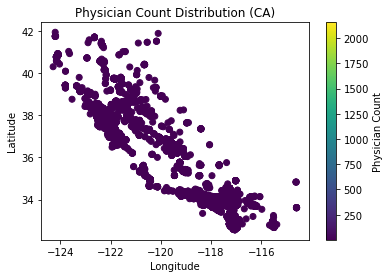

In [305]:

plt.scatter(count_spec_zip_df['Lng'],count_spec_zip_df['Lat'],c=count_spec_zip_df['NPI'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Physician Count")
plt.title("Physician Count Distribution (CA)")

plt.savefig("output_figures/Physician_Count_distribution.png")
plt.show()





In [ ]:
# count_spec_zip_df.plot(x = "County", y= ["Poverty Rate", "NPI"], kind = "bar", figsize= (20,10))


In [189]:
print(census_data["Poverty Rate"].max())
print(census_data["Poverty Rate"].min())

census_data["bin_poverty_rate"] = pd.cut(census_data["Poverty Rate"], bins = [0,5,10,20,30,40,50,60,65], labels = ["<=5","5-10","10-20","20-30", "30-40", "40-50", "50-60", ">=65" ])
census_data.head()

68.9119170984456
0.0


,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,NPI,Name,Provider_Type,Specialty,County,City,State,Lat,Lng,bin_poverty_rate
0,17065,3782.0,41.6,56118.0,32731.0,243.0,6.425172,1.154301e+09,"PELOT, MICHELE R MD",PHYSICIANS,Anesthesiology,Los Angeles,BALDWIN PARK,CA,34.072921,-117.730507,5-10
1,50515,193.0,45.9,30234.0,30538.0,60.0,31.088083,1.881880e+09,"CHEN, HONGWEI MD",PHYSICIANS,Internal Medicine,Santa Clara,SANTA CLARA,CA,37.335055,-121.995779,30-40
2,50530,1172.0,39.0,60903.0,25059.0,114.0,9.726962,1.649537e+09,"QAZI, MOHAMMAD U MD",PHYSICIANS,Family Practice,Riverside,RIVERSIDE,CA,33.906562,-117.470576,5-10
3,85119,24255.0,55.9,55579.0,30447.0,2785.0,11.482169,1.447280e+09,"DE LEON, AUREA A MD",PHYSICIANS,"Pediatrics, Periodontist (Dentists Only)",Santa Clara,SAN JOSE,CA,37.240400,-121.800309,10-20
4,90001,59832.0,29.1,43360.0,13727.0,15255.0,25.496390,1.053725e+09,"AKHAVAN, PARVIZ DO A MEDICAL",PHYSICIANS,"Gastroenterology (M.D. only), Oral Surgeon (De...",Los Angeles,LOS ANGELES,CA,33.960132,-118.262163,20-30


In [204]:
census_data_bins = census_data.groupby(["bin_poverty_rate"])
poverty_provider_count = census_data_bins["NPI"].count()
poverty_provider_count

poverty_provider_count = poverty_provider_count.reset_index()
poverty_provider_count
# need population as well to get rate of physicians per population





# poverty_provider_chart = county_pop_sum.plot(kind='bar', figsize = (15,10))

# # Set the xlabel and ylabel using class methods
# county_pop_chart.set_xlabel("County")
# county_pop_chart.set_ylabel("County Population")


# plt.show()
# plt.tight_layout()
# plt.savefig("output_figures/County_Population.png")

,bin_poverty_rate,NPI
0,<=5,7354
1,5-10,47331
2,10-20,50000
3,20-30,15137
4,30-40,3948
5,40-50,655
6,50-60,1
7,>=65,11


In [229]:
zip_county["bin_poverty_rate"] = pd.cut(zip_county["Poverty Rate"], bins = [0,5,10,20,30,40,50,60,65], labels = ["<=5","5-10","10-20","20-30", "30-40", "40-50", "50-60", ">=65" ])
zip_county.head()


zip_county_pop = zip_county.groupby(["bin_poverty_rate"])
zip_poverty_pop = zip_county_pop["Population"].sum()
zip_poverty_pop
zip_poverty_pop = zip_poverty_pop.reset_index()
zip_poverty_pop

bin_pop_provider = pd.merge(left = poverty_provider_count, right = zip_poverty_pop, how = "right", on="bin_poverty_rate")
bin_pop_provider

bin_pop_provider["Physician/Population%"] = bin_pop_provider["NPI"]/bin_pop_provider["Population"]*100
bin_pop_provider
bin_pop_provider['Physician/Population%'] = bin_pop_provider['Physician/Population%'].apply('{:.2f}'.format)
bin_pop_provider
bin_pop_provider['Physician/Population%']=pd.to_numeric(bin_pop_provider["Physician/Population%"])
bin_pop_provider

,bin_poverty_rate,NPI,Population,Physician/Population%
0,<=5,7354,3157901.0,0.23
1,5-10,47331,11631112.0,0.41
2,10-20,50000,16042513.0,0.31
3,20-30,15137,5051209.0,0.30
4,30-40,3948,932183.0,0.42
5,40-50,655,166018.0,0.39
6,50-60,1,320.0,0.31
7,>=65,11,935.0,1.18


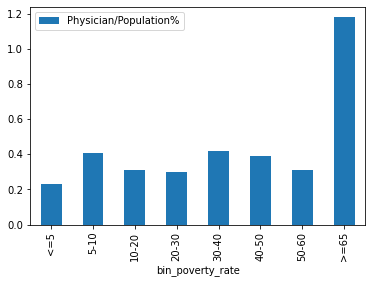

In [230]:
bin_pop_provider.plot(x='bin_poverty_rate', y='Physician/Population%', kind='bar') 
plt.show()


In [236]:
coordinates = subset_df[["Lat", "Lng"]]
Poverty_Rate = subset_df["Poverty Rate"]


fig = gmaps.figure()
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'}
fig = gmaps.figure(layout=figure_layout)
heat_layer = gmaps.heatmap_layer(coordinates, weights = Poverty_Rate, 
                                 dissipating = False, max_intensity = 20, point_radius = .1)
fig.add_layer(heat_layer)

fig


Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [264]:
coordinates = count_spec_zip_df[["Lat", "Lng"]]
Provider_Count = count_spec_zip_df["NPI"]


fig = gmaps.figure()
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'}
fig = gmaps.figure(layout=figure_layout)
heat_layer = gmaps.heatmap_layer(coordinates, weights = Provider_Count, 
                                 dissipating = False, max_intensity = 20, point_radius = .1)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [169]:
import gmaps

# locations = count_spec_zip_df[["Lat", "Lng"]]
# figure_layout = {
#     'width': '450px',
#     'height': '300px',
#     'border': '1px solid black',
#     'padding': '1px',
#     'margin': '0 auto 0 auto'}
# fig = gmaps.figure(layout=figure_layout)
# markers = gmaps.marker_layer(locations)
# fig.add_layer(markers)
# fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [279]:
#Regression dataframe
Groupby_Zip = census_data.groupby(["Zipcode"])
Poverty_sum = Groupby_Zip["Poverty Count"].sum()
Poverty_sum = Poverty_sum.reset_index()

Population_sum = Groupby_Zip["Population"].sum()
Population_sum = Population_sum.reset_index()

NPI_count = Groupby_Zip["NPI"].count()
NPI_count = NPI_count.reset_index()

zip_rates_df = pd.merge(left = Poverty_sum, right = Population_sum, how = "right", on="Zipcode")
zip_rates_df

zip_rates_df = pd.merge(left = zip_rates_df, right = NPI_count, how = "right", on="Zipcode")
zip_rates_df



# count_spec_zip_df = count_spec_zipcodes.reset_index()
# count_spec_zip_df=count_spec_zip_df.sort_values(by ="NPI", ascending = False)
# count_spec_zip_df = count_spec_zip_df.reset_index()
# count_spec_zip_df

,Zipcode,Poverty Count,Population,NPI
0,17065,243.0,3782.0,1
1,50515,60.0,193.0,1
2,50530,114.0,1172.0,1
3,85119,2785.0,24255.0,1
4,90001,320355.0,1256472.0,21
...,...,...,...,...
1139,96161,103290.0,1220208.0,66
1140,97031,895.0,18902.0,1
1141,98001,2505.0,33699.0,1
1142,99140,100.0,432.0,1


In [280]:
zip_rates_df["Poverty_rate"] = zip_rates_df["Poverty Count"]/zip_rates_df["Population"]*100
zip_rates_df["Provider_per_10k"] = zip_rates_df["NPI"]/zip_rates_df["Population"]*10000
zip_rates_df

,Zipcode,Poverty Count,Population,NPI,Poverty_rate,Provider_per_10k
0,17065,243.0,3782.0,1,6.425172,2.644104
1,50515,60.0,193.0,1,31.088083,51.813472
2,50530,114.0,1172.0,1,9.726962,8.532423
3,85119,2785.0,24255.0,1,11.482169,0.412286
4,90001,320355.0,1256472.0,21,25.496390,0.167135
...,...,...,...,...,...,...
1139,96161,103290.0,1220208.0,66,8.464950,0.540891
1140,97031,895.0,18902.0,1,4.734949,0.529045
1141,98001,2505.0,33699.0,1,7.433455,0.296745
1142,99140,100.0,432.0,1,23.148148,23.148148


The r-squared is: 0.003324806338568086


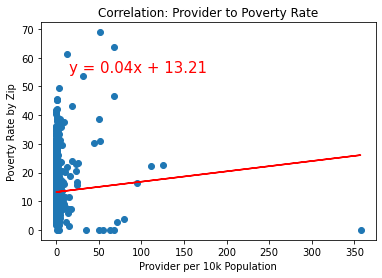

In [317]:
y_values = zip_rates_df['Poverty_rate']
x_values = zip_rates_df['Provider_per_10k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,55),fontsize=15,color="red")
plt.ylabel('Poverty Rate by Zip')
plt.xlabel('Provider per 10k Population')
print(f"The r-squared is: {rvalue**2}")
plt.title("Correlation: Provider to Poverty Rate")
plt.savefig("output_figures/Regression.png")
plt.show()


The r-squared is: 0.0028471035004059182


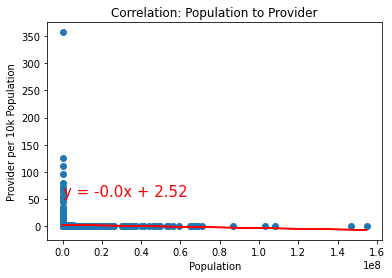

In [318]:
x_values = zip_rates_df['Population']
y_values = zip_rates_df['Provider_per_10k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,55),fontsize=15,color="red")
plt.xlabel('Population')
plt.ylabel('Provider per 10k Population')
print(f"The r-squared is: {rvalue**2}")
plt.title("Correlation: Population to Provider")
plt.savefig("output_figures/Regression_Population.png")
plt.show()
